In [ ]:
import pandas as pd
from datetime import datetime

file_path = "/content/drive/MyDrive/wifo dosyalar/finalfinal_reviews.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# 2. Sütun adlarını Almanca yap
df = df.rename(columns={
    'brand_name': 'Marke',
    'category_name': 'Kategorie',
    'parent_company': 'Dachgesellschaft',
    'comment_date': 'Datum',
    'comment_rating': 'Bewertung',
    'comment_clean': 'Kommentar'
})

# 3. Kategoriename düzenleme (şampuan türlerini ayır, diğerlerini çevir)
def kategorien_ersetzen(row):
    if row['Kategorie'] == 'şampuan':
        if row['Marke'] in ['Head&Shoulders', 'Clear Men']:
            return 'Herrenshampoo'
        else:
            return 'Frauenshampoo'
    elif row['Kategorie'] == 'diş fırçası':
        return 'Zahnbürste'
    elif row['Kategorie'] == 'diş macunu':
        return 'Zahnpasta'
    elif row['Kategorie'] == 'deodorant':
        return 'Deodorant'
    else:
        return row['Kategoriename']

df['Kategorie'] = df.apply(kategorien_ersetzen, axis=1)

# 4. Türkçe tarihleri datetime2 formatına çevir
turkish_months = {
    'Ocak': 'January', 'Şubat': 'February', 'Mart': 'March', 'Nisan': 'April',
    'Mayıs': 'May', 'Haziran': 'June', 'Temmuz': 'July', 'Ağustos': 'August',
    'Eylül': 'September', 'Ekim': 'October', 'Kasım': 'November', 'Aralık': 'December'
}

def convert_turkish_date(date_str):
    try:
        for tr, en in turkish_months.items():
            if tr in date_str:
                date_str = date_str.replace(tr, en)
        return datetime.strptime(date_str.strip(), "%d %B %Y")
    except:
        return pd.NaT

df['Datum'] = df['Datum'].apply(convert_turkish_date)


# 5. Yeni CSV olarak kaydet
df.to_csv("alm_reviews.csv", index=False)



Logistic Regression Accuracy: 93.73%
              precision    recall  f1-score   support

    Negative       0.90      0.75      0.82       665
    Positive       0.94      0.98      0.96      2892

    accuracy                           0.94      3557
   macro avg       0.92      0.87      0.89      3557
weighted avg       0.94      0.94      0.94      3557



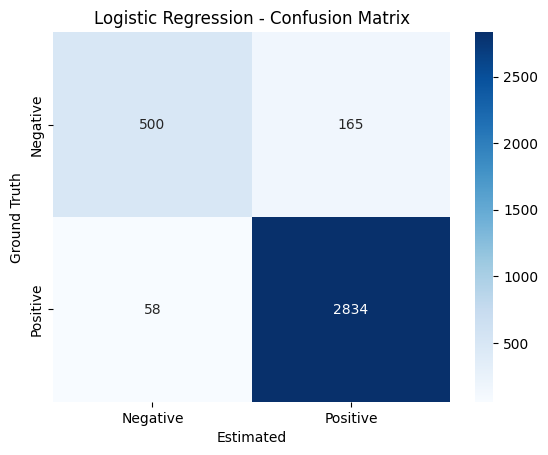

SVM Accuracy: 93.67%
              precision    recall  f1-score   support

    Negative       0.78      0.93      0.85       665
    Positive       0.98      0.94      0.96      2892

    accuracy                           0.94      3557
   macro avg       0.88      0.93      0.90      3557
weighted avg       0.94      0.94      0.94      3557



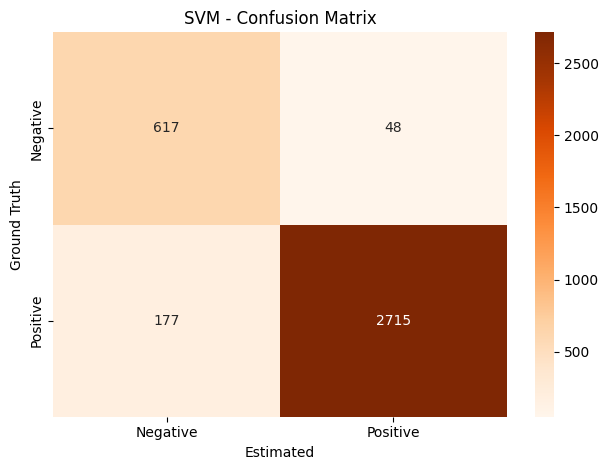

Random Forest Accuracy: 94.10%
              precision    recall  f1-score   support

    Negative       0.87      0.80      0.83       665
    Positive       0.95      0.97      0.96      2892

    accuracy                           0.94      3557
   macro avg       0.91      0.89      0.90      3557
weighted avg       0.94      0.94      0.94      3557



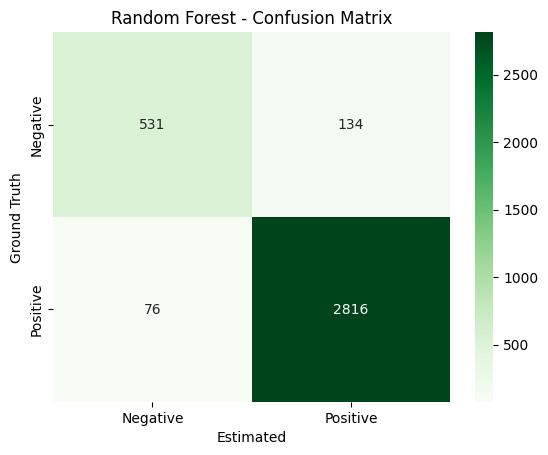

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:57:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 93.73%
              precision    recall  f1-score   support

    Negative       0.87      0.78      0.82       665
    Positive       0.95      0.97      0.96      2892

    accuracy                           0.94      3557
   macro avg       0.91      0.88      0.89      3557
weighted avg       0.94      0.94      0.94      3557



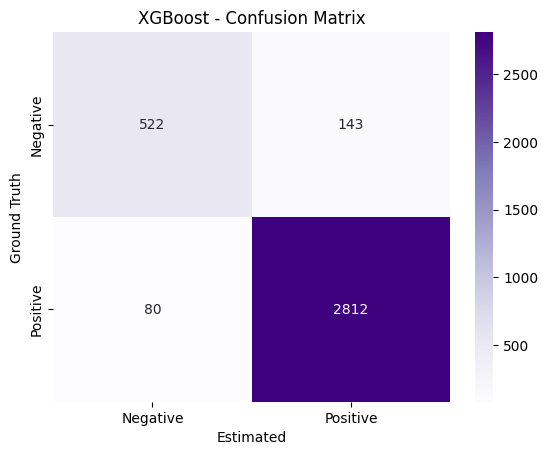

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score


base_drive_path = "/content/drive/MyDrive/wifo dosyalar/"

df = pd.read_csv(base_drive_path + "benimmodel_etiket.csv")

X = df["comment_clean"]
y = df["label"].astype(int)


# Eğitim / test böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF ile metni sayısala çevir
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

##logic regression
# Modeli tanımla ve eğit
lr_model = LogisticRegression(max_iter=1000)  # iter sayısını artırmazsak convergence hatası verebilir
lr_model.fit(X_train_tfidf, y_train)

# Tahmin
y_pred_lr = lr_model.predict(X_test_tfidf)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.2%}")

print(classification_report(y_test, y_pred_lr, target_names=["Negative", "Positive"]))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Estimated")
plt.ylabel("Ground Truth")
plt.show()


##SVM Modeli
svm_model = SVC(kernel="linear", class_weight="balanced")
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)

print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.2%}")

print(classification_report(y_test, y_pred_svm, target_names=["Negative", "Positive"]))

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("SVM - Confusion Matrix")
plt.xlabel("Estimated")
plt.ylabel("Ground Truth")
plt.tight_layout()
plt.show()



## # Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_model.fit(X_train_tfidf, y_train)

y_pred_rf = rf_model.predict(X_test_tfidf)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2%}")

print(classification_report(y_test, y_pred_rf, target_names=["Negative", "Positive"]))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Estimated")
plt.ylabel("Ground Truth")
plt.show()


# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_tfidf, y_train)


y_pred_xgb = xgb_model.predict(X_test_tfidf)


print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.2%}")

print(classification_report(y_test, y_pred_xgb, target_names=["Negative", "Positive"]))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Purples", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Estimated")
plt.ylabel("Ground Truth")
plt.show()


